In [1]:
# 同时显示多个结果
# python函数返回多个结果时，结果是元组格式
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import numpy as np

# sklearn实现

## 均方误差

## 错误率与精度

### **sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None):**  
**y_true：**y的真实值  
**y_pred：**y的预测值  
**normalize：**为True时，返回正确分类比率，为False时，返回正确分类个数
**sample_weight：**样本权重

In [3]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3, 1]
y_true = [0, 1, 2, 3, 1]
accuracy_score(y_true,y_pred)
accuracy_score(y_true, y_pred, normalize=False)
accuracy_score(y_true, y_pred, normalize=False, sample_weight = [0.1, 0.3, 0.3, 0.1, 0.2])

0.6

3

0.4

## 查准率、查全率与F1

### sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn'):  
### recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')：
### f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')：
**y_true:**真实值  
**y_pred:**预测值  
**labels:**类别标签  
**pos_labels:**只针对二分类，计算pos_label这一类数据的怕precision，如果是多分类，该参数不起作用  
**average：**binary—二分类；micro-计算全局的precision；macro-计算每类数据的precision，然后进行不加劝平均；weighted-计算每类数据的precision，然后进行加劝平均；sample-计算某个具体指标的precision，然后求平均；  
**sample_weight：**样本权重  
**zero_division：**当tp+fp等于0时，该参数会发出警告。

In [4]:
# 0--反例 1--正例
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = [0, 1, 1, 0, 1, 0, 0, 0, 1, 1]
y_true = [0, 0, 1, 0, 1, 1, 0, 0, 0, 1]
print('precision:{}'.format(precision_score(y_true, y_pred)))
print('recall:{}'.format(recall_score(y_true, y_pred)))
print('f1:{}'.format(f1_score(y_true, y_pred)))

precision:0.6
recall:0.75
f1:0.6666666666666665


### precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None):  
**y_true：**真实值  
**prob_pred：**预测概率  
**pos_label：**正样本标签  
**sample_weight：**样本权重

In [77]:
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 1, 0, 1, 1, 0])
y_scores = np.array([0.1, 0.6, 0.4, 0.35, 0.8, 0.72])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

In [78]:
precision
recall
thresholds

array([0.6       , 0.5       , 0.66666667, 0.5       , 1.        ,
       1.        ])

array([1.        , 0.66666667, 0.66666667, 0.33333333, 0.33333333,
       0.        ])

array([0.35, 0.4 , 0.6 , 0.72, 0.8 ])

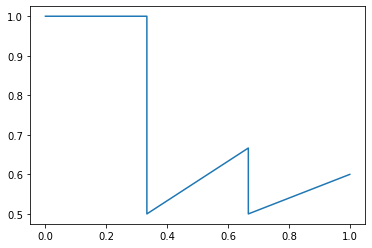

In [7]:
from matplotlib import pyplot as plt
plt.plot(recall, precision)

# 自己实现

代码参考：sklearn源码  
在代码实现层面，书中错误率与精度的二值函数可以用判断方法==来实现

## accuracy_score

**np.average(a, axis=None, weights=None, returned=False):**求a的平均值  
**np.dot：**点积  

In [8]:
def accuracy_score_myown(y_true, y_pred, normalize=True, sample_weight=None):
    sample_score = np.array(y_pred) == np.array(y_true)
    if normalize:
        return np.average(sample_score, weights = sample_weight)
    elif sample_weight is not None:
        return np.dot(sample_score, sample_weight)
    else:
        return sample_score.sum()

In [9]:
y_pred = [0, 2, 1, 3, 1]
y_true = [0, 1, 2, 3, 1]
accuracy_score_myown(y_true,y_pred)
accuracy_score_myown(y_true, y_pred, normalize=False)
accuracy_score_myown(y_true, y_pred, normalize=False, sample_weight = [0.1, 0.3, 0.3, 0.1, 0.2])

0.6

3

0.4

## 查准率、查全率、F1

查准率、查全率和f1都是基于混淆矩阵来计算的，scikit-learn中也提供了metric.confusion_matrix来计算混淆矩阵

**混淆矩阵coo_matrix((data, (i, j)), shape=(M, N)):**  
**data：**就是原始矩阵中的数据；  
**i：**就是行的指示符号，例如假设i=[0,1,2,3,4]，第1个元素是0，就代表data中第一个数据在第1行；  
**j：**就是列的指示符号，例如假设j=[1,1,2,2,2]，第1个元素是1，就代表data中第一个数据在第2列；  
**shape：**coo_matrix原始矩阵的形状，除了上述的有数据的行列，其他无数据处按照shape的形式补0。

**ravel():**扁平化，即多维数据拉平为一维数组

In [10]:
from scipy.sparse import coo_matrix
class metric_myown:
    def __init__(self):
        pass
    
    def confusion_matrix(self, y_true, y_pred, labels=None, sample_weight=None):
        if labels is None:
            labels = np.unique(y_pred + y_true)
        else:
            labels = np.asarray(labels)
        n_labels = labels.size
        if sample_weight is None:
            sample_weight = np.ones(len(y_true), dtype = np.int64)
        cm = coo_matrix((sample_weight,(y_true, y_pred)), shape = (n_labels, n_labels)).toarray()
        return cm
    
    def binary_case(self, y_true, y_pred): # 即书中的表2.1
        tn, fp, fn, tp = self.confusion_matrix(y_true, y_pred).ravel()
        return tn, fp, fn, tp
    
    def precision_score_myown(self, y_true, y_pred):
        tn, fp, fn, tp = self.binary_case(y_true, y_pred)
        return tp/(tp+fp)
    
    def recall_score_myown(self, y_true, y_pred):
        tn, fp, fn, tp = self.binary_case(y_true, y_pred)
        return tp/(tp+fn)
    
    def f1_score_myown(self, y_ture, y_pred):
        p = self.precision_score_myown(y_true, y_pred)
        r = self.recall_score_myown(y_true, y_pred)
        return 2*p*r/(p+r)

In [11]:
y_pred = [0, 1, 1, 0, 1, 0, 0, 0, 1, 1]
y_true = [0, 0, 1, 0, 1, 1, 0, 0, 0, 1]
mm = metric_myown()
cm = mm.confusion_matrix(y_true, y_pred)
print('precision:{}'.format(mm.precision_score_myown(y_true, y_pred)))
print('recall:{}'.format(mm.recall_score_myown(y_true, y_pred)))
print('f1:{}'.format(mm.f1_score_myown(y_true, y_pred)))

precision:0.6
recall:0.75
f1:0.6666666666666665


In [12]:
cm

array([[4, 2],
       [1, 3]], dtype=int64)

## precision_recall_curve

只针对书中表2.1展示的二分情况

**np.argsort(a, axis=-1, kind='quicksort', order=None)：**将a按照从小到大排序，然后输出对应的索引。  
**numpy.searchsorted(a, v, side='left', sorter=None)：**在的数组a中左侧插入v，并返回v的索引。   

In [38]:
def precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None):
    if pos_label is None:
        pos_label = 1
    #y_true = (y_true == pos_label)

    desc_score_indices = np.argsort(-y_scores) # 负号就变成了从大到小排序
    y_scores = y_scores[desc_score_indices]
    y_true = y_true[desc_score_indices]

    if sample_weight is not None:
        weight = sample_weight[desc_score_indices]
    else:
        weight = 1

    tps = np.cumsum(y_true * weight) # tp是真正例，因此tps就是y_true依次累计求和
    fps = np.cumsum((1 - y_true) * weight) #fp是假正例，因此fps就是(1-y_true)依次累计求和
        
    precision = tps / (tps + fps)
    precision[np.isnan(precision)] = 0
    recall = tps / tps[-1]
    
    last_ind = tps.searchsorted(tps[-1])
    sl = slice(last_ind, None, -1)
    return np.r_[precision[sl], 1], np.r_[recall[sl], 0], y_scores[sl]

In [79]:
y_true = np.array([0, 1, 0, 1, 1, 0])
y_scores = np.array([0.1, 0.6, 0.4, 0.35, 0.8, 0.72])
#precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

In [80]:
pos_label=None
sample_weight=None

if pos_label is None:
    pos_label = 1
#y_true = (y_true == pos_label)

desc_score_indices = np.argsort(-y_scores) # 负号就变成了从大到小排序
y_scores = y_scores[desc_score_indices]
y_true = y_true[desc_score_indices]

if sample_weight is not None:
    weight = sample_weight[desc_score_indices]
else:
    weight = 1
    
tps = np.cumsum(y_true * weight)
fps = np.cumsum((1 - y_true) * weight)

precision = tps / (tps + fps)
precision[np.isnan(precision)] = 0
recall = tps / tps[-1]
last_ind = tps.searchsorted(tps[-1])
sl = slice(last_ind, None, -1)

In [81]:
y_scores
y_true
desc_score_indices
tps
fps
precision
recall
last_ind
sl
np.r_[precision[sl], 1]
np.r_[recall[sl], 0]
y_scores[sl]

array([0.8 , 0.72, 0.6 , 0.4 , 0.35, 0.1 ])

array([1, 0, 1, 0, 1, 0])

array([4, 5, 1, 2, 3, 0], dtype=int64)

array([1, 1, 2, 2, 3, 3], dtype=int32)

array([0, 1, 1, 2, 2, 3], dtype=int32)

array([1.        , 0.5       , 0.66666667, 0.5       , 0.6       ,
       0.5       ])

array([0.33333333, 0.33333333, 0.66666667, 0.66666667, 1.        ,
       1.        ])

4

slice(4, None, -1)

array([0.6       , 0.5       , 0.66666667, 0.5       , 1.        ,
       1.        ])

array([1.        , 0.66666667, 0.66666667, 0.33333333, 0.33333333,
       0.        ])

array([0.35, 0.4 , 0.6 , 0.72, 0.8 ])

In [17]:
array([0.6       , 0.5       , 0.66666667, 0.5       , 1.        ,
       1.        ])
array([1.        , 0.66666667, 0.66666667, 0.33333333, 0.33333333,
       0.        ])
array([0.35, 0.4 , 0.6 , 0.72, 0.8 ])

NameError: name 'array' is not defined

In [ ]:
np.arange(len(y_true)

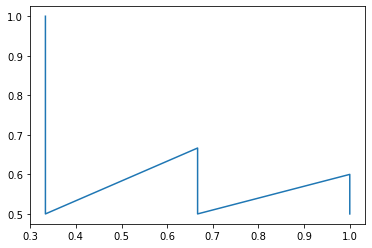

In [18]:
plt.plot(recall, precision)